In [39]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import openpyxl
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

df = pd.read_excel("/Users/gimjimin/Desktop/이대_데싸/고급통계/locallive.xlsx")

In [40]:
df.drop(['Unnamed: 9','Unnamed: 10'], axis=1, inplace=True)

In [162]:
df.head()

,주문번호,id,amount,sumprice,delivery,count,point,coupon,final price,sex,age,group
0,A2334033505505,A,4,72000,0,0,132000,0,0,남,37,일반회원
1,A2334099660660,B,1,11900,0,0,88600,0,0,남,34,일반회원
2,A2334099660660,C,1,12900,0,0,88600,0,0,남,34,일반회원
3,A2334099660660,D,1,13800,0,0,88600,0,0,여,36,일반회원
4,A2334099660660,E,1,11400,0,0,88600,0,0,여,57,일반회원


In [42]:
#id의 unique 값 찾기
df['id'].nunique()

9324

In [43]:
#각 row별로 중복인 값들을 하나로 sum해서 합치기
sumdf = df.groupby('id').agg({
    'amount':'sum',
    'sumprice':'sum',
    'delivery':'sum',
    'count':'sum',
    'point':'sum',
    'coupon':'sum',
    'final price':'sum',
    'sex':'first', #각 sex 내에서 첫번째 값만 유지
    'age':'first', #각 age 내에서 첫번째 값만 유지
    'group':'first', #각 id 그룹 내에서 첫번째 값만 유지
}).reset_index()

In [44]:
sumdf

,id,amount,sumprice,delivery,count,point,coupon,final price,sex,age,group
0,A,2,23200,0,0,0,8000,15200,여,37,일반회원
1,B,15,348900,11500,0,464600,10000,17000,여,36,일반회원
2,C,3,221600,6000,0,200000,0,27600,남,39,일반회원
3,D,1,5300,0,0,0,5000,300,남,30,일반회원
4,E,3,35400,0,0,0,0,35400,여,44,일반회원
...,...,...,...,...,...,...,...,...,...,...,...
9319,F,1,5300,0,0,0,5000,300,여,46,일반회원
9320,G,1,5300,0,0,0,5000,300,여,58,일반회원
9321,H,1,5300,0,0,0,5000,300,여,39,일반회원
9322,I,3,27300,9500,0,0,16700,20100,여,64,일반회원


In [45]:
#group=멤버십인 행만 추출
sumdf[sumdf['group'] == '멤버십']

,id,amount,sumprice,delivery,count,point,coupon,final price,sex,age,group
76,A,29,182400,15500,0,4370,128350,190180,여,52,멤버십
96,B,18,185100,17400,0,150220,44660,7620,남,37,멤버십
216,C,10,134600,6000,0,4560,58400,145540,여,50,멤버십
229,D,29,866600,27500,0,493490,90180,783330,여,24,멤버십
249,E,32,627780,28500,0,858490,58670,464480,여,59,멤버십
...,...,...,...,...,...,...,...,...,...,...,...
8937,F,18,255400,0,0,8870,55590,469740,여,26,멤버십
8951,G,16,266500,33500,0,6850,50700,419650,남,49,멤버십
9186,H,104,754300,26000,105000,77160,133580,1048260,남,21,멤버십
9244,I,68,1202400,38000,0,56370,242370,1410160,여,42,멤버십


In [46]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
sumdf['group'] = encoder.fit_transform(sumdf['group'].values) #일반회원:1 / 멤버십:0 
sumdf['id'] = encoder.fit_transform(sumdf['id'].values)
sumdf['sex'] = encoder.fit_transform(sumdf['sex'].values)

In [161]:
sumdf['group'].value_counts()

group
1    9253
0      71
Name: count, dtype: int64

In [97]:
sumdf[sumdf['group'] == 0]

,id,amount,sumprice,delivery,count,point,coupon,final price,sex,age,group
76,76,29,182400,15500,0,4370,128350,190180,1,52,0
96,96,18,185100,17400,0,150220,44660,7620,0,37,0
216,216,10,134600,6000,0,4560,58400,145540,1,50,0
229,229,29,866600,27500,0,493490,90180,783330,1,24,0
249,249,32,627780,28500,0,858490,58670,464480,1,59,0
...,...,...,...,...,...,...,...,...,...,...,...
8937,8937,18,255400,0,0,8870,55590,469740,1,26,0
8951,8951,16,266500,33500,0,6850,50700,419650,0,49,0
9186,9186,104,754300,26000,105000,77160,133580,1048260,0,21,0
9244,9244,68,1202400,38000,0,56370,242370,1410160,1,42,0


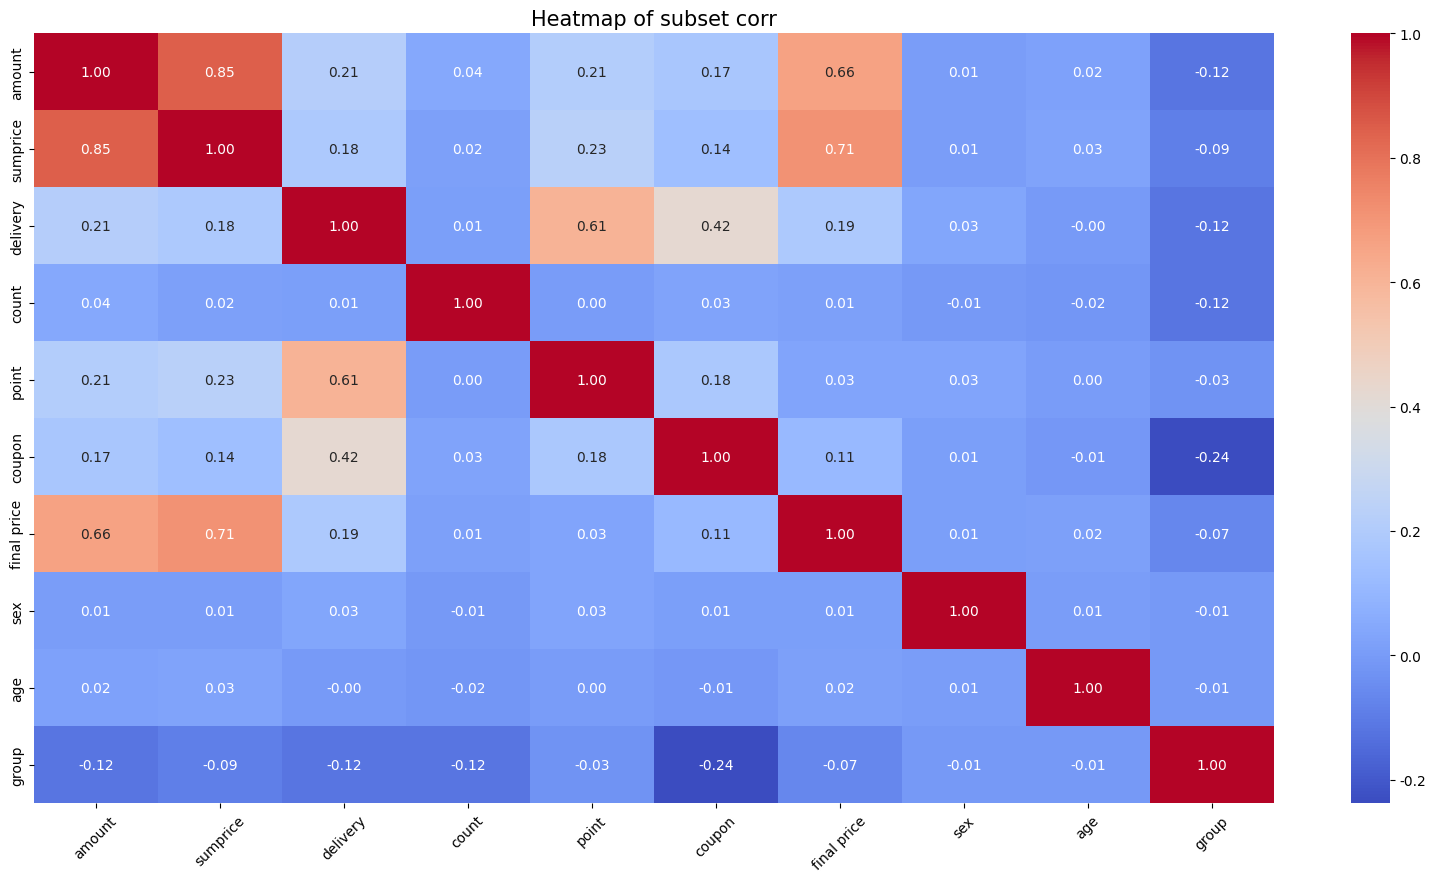

In [47]:
#변수들 간의 상관관계 파악(heatmap)
corr_x = sumdf.drop(['id'], axis=1)
corr = corr_x.corr()

# 현재 화면의 크기를 가져오기
fig, ax = plt.subplots(figsize=(20, 10))  # 적절한 값을 선택

# 히트맵 그리기
sns.heatmap(data=corr, cmap='coolwarm', cbar=True, annot=True, fmt='.2f', ax=ax)
plt.title('Heatmap of subset corr', fontsize=15)
plt.xticks(rotation=45)
plt.show()

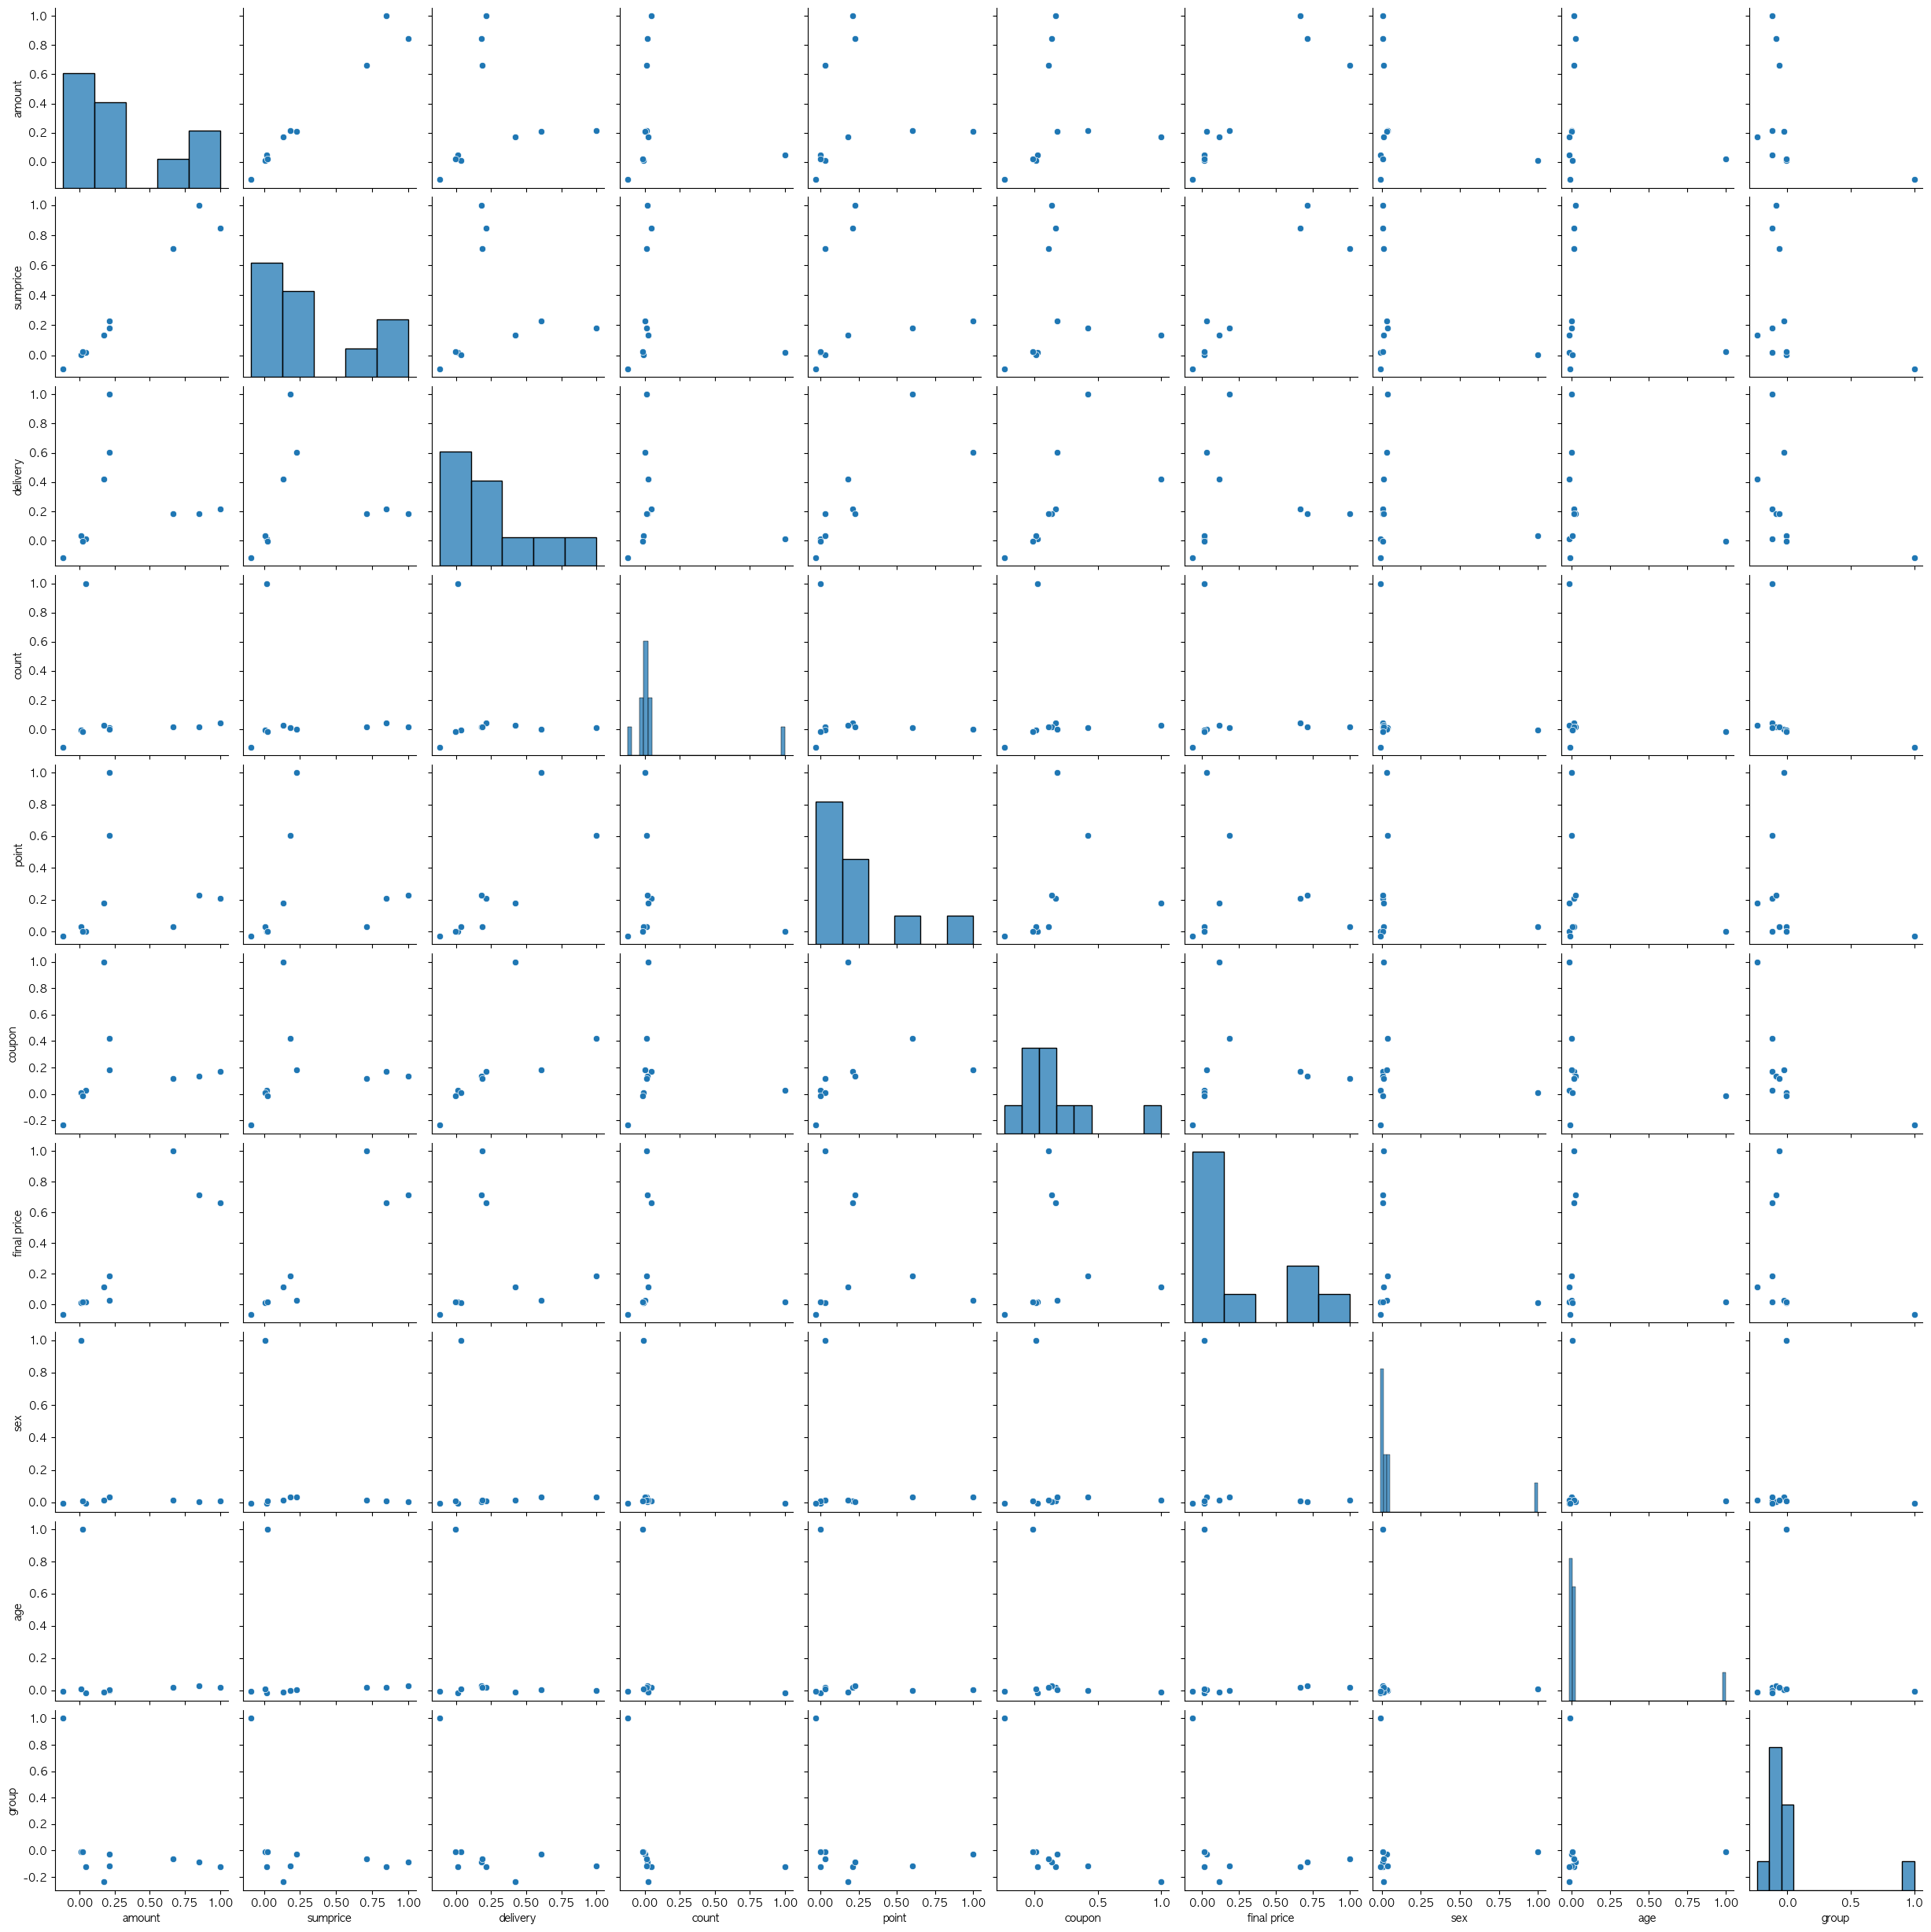

In [163]:
sns.pairplot(corr)
plt.show()

In [48]:
#설명변수 VIF지수를 활용한 다중공선성 여부 확인
#설명변수들은 각각 충분한 독립성을 갖고 있음
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = sumdf.drop(['group'], axis=1)

vif = pd.DataFrame()
vif["vif factor"] = [variance_inflation_factor(
    x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif = vif.sort_values("vif factor").reset_index(drop=True)
vif

,vif factor,features
0,1.004727,count
1,1.327029,coupon
2,1.590040,sex
3,1.877206,point
4,2.110014,delivery
5,2.318588,final price
6,3.225164,id
7,3.611765,age
8,3.828544,amount
9,4.476710,sumprice


In [50]:
#데이터 정규화
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler().fit_transform(x)
scaling = pd.DataFrame(scaling, index=x.index, columns=x.columns)
clustering = scaling
clustering.head()

,id,amount,sumprice,delivery,count,point,coupon,final price,sex,age
0,-1.731865,-0.091229,-0.095039,-0.232863,-0.010658,-0.197222,-0.092786,-0.058723,1.235649,-0.399858
1,-1.731494,0.443983,0.629966,0.257280,-0.010658,1.012460,-0.049806,-0.056571,1.235649,-0.475436
2,-1.731122,-0.050059,0.346598,0.022864,-0.010658,0.323519,-0.264708,-0.043898,-0.809291,-0.248701
3,-1.730750,-0.132399,-0.134884,-0.232863,-0.010658,-0.197222,-0.157257,-0.076538,-0.809291,-0.928906
4,-1.730379,-0.050059,-0.067882,-0.232863,-0.010658,-0.197222,-0.264708,-0.034572,1.235649,0.129190


In [51]:
#sparse PCA를 통한 차원축소
from sklearn.decomposition import SparsePCA

#spca 모델 생성 및 학습
n_components = 8 #원하는 주성분의 수
alpha = 0.2

sparse_pca = SparsePCA(n_components=n_components, alpha=alpha, random_state=42)
sparse_pca.fit(clustering)

#주성분 추출
spca = sparse_pca.components_

#주성분 가중치 확인
weights = pd.DataFrame(sparse_pca.components_, columns=clustering.columns)
weights

,id,amount,sumprice,delivery,count,point,coupon,final price,sex,age
0,0.000000,0.603764,0.617602,0.000000,0.000000,0.086047,0.00000,0.496622,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.545538,0.000000,0.808759,0.00000,-0.219768,0.000000,0.000000
2,0.000000,0.028274,0.000000,0.000000,0.965252,0.000000,0.00000,0.000000,0.000000,-0.259787
3,0.999835,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.018179,0.000000,0.000000
4,0.000000,0.000000,-0.000557,0.000000,0.000000,0.000000,0.00000,0.001012,0.999999,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.242782,0.000000,0.00000,-0.005353,0.000000,0.970066
6,0.000000,0.052925,0.000000,0.286564,0.000000,0.000000,0.95616,-0.028962,0.000000,0.000000
7,0.000000,-0.031645,0.000000,0.753384,0.000000,0.000000,0.00000,0.656819,0.000000,0.000000


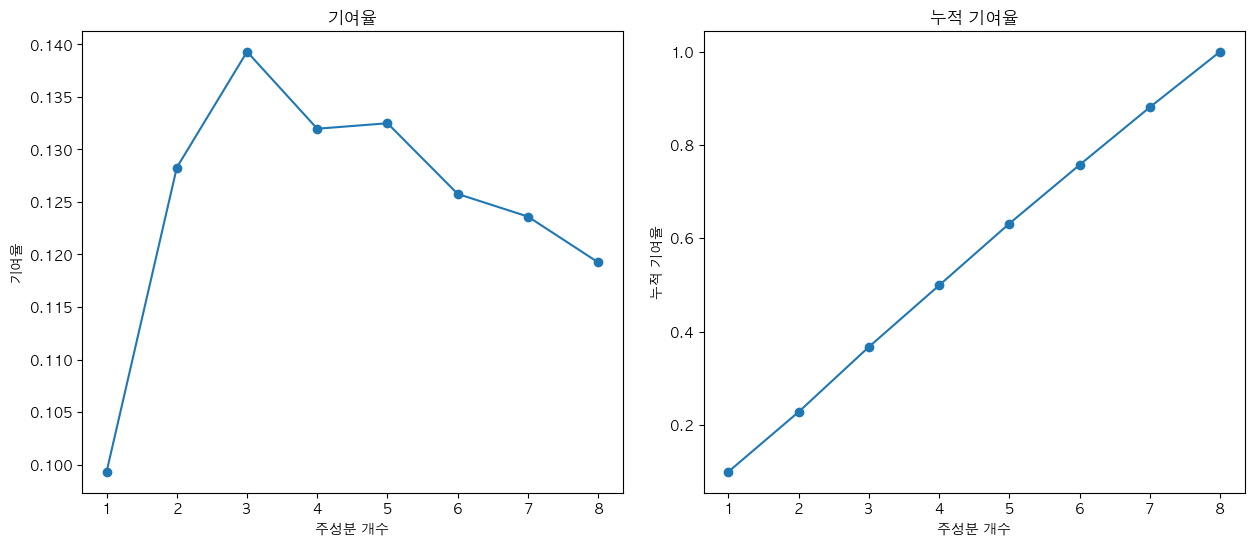

In [53]:
#최적의 주성분 개수를 찾기 위한 Scree plot 그리기
plt.figure(figsize=(15,6))
plt.rcParams["font.family"] = "AppleGothic"

sv = np.var(spca, axis=1) / np.sum(np.var(spca, axis=1))
cumulative = sv.cumsum()

#그래프1: 고윳값
plt.subplot(1,2,1)
plt.plot(range(1, len(sv)+1), sv, marker='o', linestyle='-')
plt.title('기여율')
plt.xlabel('주성분 개수')
plt.ylabel('기여율')

#그래프2: 누적 기여율
plt.subplot(1,2,2)
plt.plot(range(1, len(sv)+1), cumulative, marker='o', linestyle='-')
plt.title('누적 기여율')
plt.xlabel('주성분 개수')
plt.ylabel('누적 기여율')

plt.subplots_adjust(wspace=0.15) #각 그래프가 겹치지 않도록 subplot 간 간격 조절
plt.show()

In [54]:
cumulative

array([0.09931522, 0.22759676, 0.36690281, 0.498877  , 0.63137301,
       0.7571385 , 0.88074775, 1.        ])

In [61]:
# 주성분 8까지 각 가중치가 높은 상세 변수 파악
selected_components = 8
selected_weights = spca[:selected_components, :]

# 각 주성분에 대한 가중치 확인
for i in range(selected_components):
    component_weights = selected_weights[i, :]
    sorted_indices = np.argsort(np.abs(component_weights))[::-1]  # 가중치의 절댓값을 기준으로 내림차순 정렬
    top_variables = clustering.columns[sorted_indices][:10]  # 가중치가 큰 상위 10개 변수 선택
    print(f"주성분 {i+1}의 가중치가 큰 상위 변수 10개:")
    print(top_variables)
    print()

주성분 1의 가중치가 큰 상위 변수 10개:
Index(['sumprice', 'amount', 'final price', 'point', 'age', 'sex', 'coupon',
       'count', 'delivery', 'id'],
      dtype='object')

주성분 2의 가중치가 큰 상위 변수 10개:
Index(['point', 'delivery', 'final price', 'age', 'sex', 'coupon', 'count',
       'sumprice', 'amount', 'id'],
      dtype='object')

주성분 3의 가중치가 큰 상위 변수 10개:
Index(['count', 'age', 'amount', 'sex', 'final price', 'coupon', 'point',
       'delivery', 'sumprice', 'id'],
      dtype='object')

주성분 4의 가중치가 큰 상위 변수 10개:
Index(['id', 'final price', 'age', 'sex', 'coupon', 'point', 'count',
       'delivery', 'sumprice', 'amount'],
      dtype='object')

주성분 5의 가중치가 큰 상위 변수 10개:
Index(['sex', 'final price', 'sumprice', 'age', 'coupon', 'point', 'count',
       'delivery', 'amount', 'id'],
      dtype='object')

주성분 6의 가중치가 큰 상위 변수 10개:
Index(['age', 'count', 'final price', 'sex', 'coupon', 'point', 'delivery',
       'sumprice', 'amount', 'id'],
      dtype='object')

주성분 7의 가중치가 큰 상위 변수 10개:
Index(['coupon'

In [62]:
#주성분 개수 6개로 하여 SPCA 진행
n_components = 6
alpha = 0

sparsepca = SparsePCA(n_components=n_components, alpha=alpha, random_state=42)
sparsepca.fit(clustering)

spca = pd.DataFrame(data=sparsepca.transform(clustering), columns=[f'spca{i+1}' for i in range(n_components)])
spca

,spca1,spca2,spca3,spca4,spca5,spca6
0,-0.244804,0.085036,-0.478061,-1.421504,1.325888,0.795208
1,0.901818,-0.527406,-0.518825,-1.402231,1.283632,0.663131
2,0.159102,-0.010019,0.219491,-1.631806,-0.560779,0.636228
3,-0.357554,0.182750,0.659378,-1.939515,-0.260043,0.298668
4,-0.228421,0.197336,-0.796131,-1.194310,1.120943,1.083701
...,...,...,...,...,...,...
9319,-0.316830,0.179029,-0.485600,1.727421,0.928029,-0.627191
9320,-0.303046,0.214420,-0.998276,2.101959,0.567713,-0.108120
9321,-0.324876,0.158403,-0.186433,1.509734,1.138178,-0.930484
9322,-0.033464,-0.056752,-1.231237,2.280148,0.365302,0.163226


# 1.Data Transform Bagging Ensemble

In [63]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

>norm: 0.987 (0.003)
>std: 0.987 (0.003)
>robust: 0.987 (0.003)
>power: 0.987 (0.003)
>quant: 0.986 (0.003)
>kbins: 0.986 (0.003)
>ensemble: 0.987 (0.003)


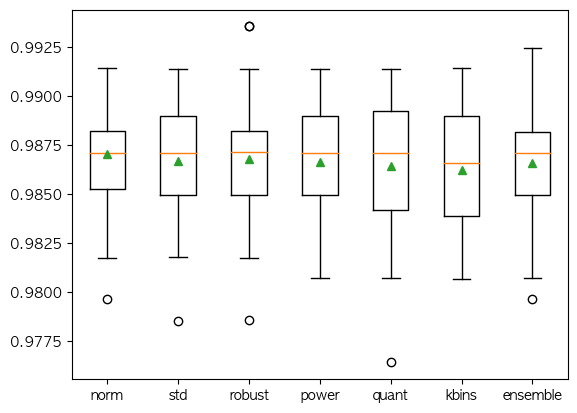

In [64]:
from matplotlib import pyplot

# 앙상블 정의
def get_ensemble():
    models = list()
    
    # normalization
    norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeClassifier())])
    models.append(('norm', norm))
    # standardization
    st = Pipeline([('s', StandardScaler()), ('m', DecisionTreeClassifier())])
    models.append(('std', st))
    # robust
    robust = Pipeline([('s', RobustScaler()), ('m', DecisionTreeClassifier())])
    models.append(('robust', robust))
    # power
    power = Pipeline([('s', PowerTransformer()), ('m', DecisionTreeClassifier())])
    models.append(('power', power))
    # quantile
    quant = Pipeline([('s', QuantileTransformer(n_quantiles=100,
    output_distribution='normal')), ('m', DecisionTreeClassifier())])
    models.append(('quant', quant))
    # kbins
    kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m',
    DecisionTreeClassifier())])
    models.append(('kbins', kbins))
    
    # voting 모델 정의
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return models + [('ensemble', ensemble)]

#자료 생성
X_features = sumdf.drop(['group'], axis=1)
y_target = sumdf['group']

#모델 정의
models = get_ensemble()

#모델 평가 및 성능 출력
results = list()
for name, model in models:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X_features, y_target, scoring='accuracy', cv=cv, n_jobs=1)
    results.append(n_scores)
    print('>%s: %.3f (%.3f)' % (name, mean(n_scores), std(n_scores)))

#성능 비교 그래프
pyplot.boxplot(results, labels =[n for n,_ in models], showmeans=True)
pyplot.show()

>norm: 0.987 (0.002)
>std: 0.987 (0.002)
>robust: 0.987 (0.003)
>power: 0.987 (0.002)
>quant: 0.987 (0.002)
>kbins: 0.987 (0.003)
>ensemble: 0.987 (0.002)


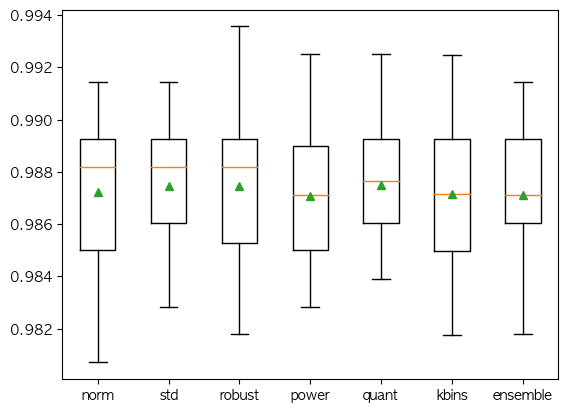

In [65]:
from matplotlib import pyplot

# 앙상블 정의
def get_ensemble():
    models = list()
    
    # normalization
    norm = Pipeline([('s', MinMaxScaler()), ('m', DecisionTreeClassifier())])
    models.append(('norm', norm))
    # standardization
    st = Pipeline([('s', StandardScaler()), ('m', DecisionTreeClassifier())])
    models.append(('std', st))
    # robust
    robust = Pipeline([('s', RobustScaler()), ('m', DecisionTreeClassifier())])
    models.append(('robust', robust))
    # power
    power = Pipeline([('s', PowerTransformer()), ('m', DecisionTreeClassifier())])
    models.append(('power', power))
    # quantile
    quant = Pipeline([('s', QuantileTransformer(n_quantiles=100,
    output_distribution='normal')), ('m', DecisionTreeClassifier())])
    models.append(('quant', quant))
    # kbins
    kbins = Pipeline([('s', KBinsDiscretizer(n_bins=20, encode='ordinal')), ('m',
    DecisionTreeClassifier())])
    models.append(('kbins', kbins))
    
    # voting 모델 정의
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return models + [('ensemble', ensemble)]

#spca 자료 활용
spca
y_target = sumdf['group']

#모델 정의
models = get_ensemble()

#모델 평가 및 성능 출력
results = list()
for name, model in models:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, spca, y_target, scoring='accuracy', cv=cv, n_jobs=1)
    results.append(n_scores)
    print('>%s: %.3f (%.3f)' % (name, mean(n_scores), std(n_scores)))

#성능 비교 그래프
pyplot.boxplot(results, labels =[n for n,_ in models], showmeans=True)
pyplot.show()

In [66]:
#단일 Decision Tree 모델 성능 평가
model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_features, y_target, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.986 (0.003)


In [67]:
#단일 Decision Tree 모델 성능 평가
model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, spca, y_target, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.987 (0.002)


# 2. AdaBoost Ensemble Algorithm

In [113]:
# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

#데이터 생성
X_features = sumdf.drop(['group'], axis=1)
y_target = sumdf['group']

# define the model
model = AdaBoostClassifier()

# define the evaluation method (3번 반복된 10-fold CV)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model on the dataset
n_scores = cross_val_score(model, X_features, y_target, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.992 (0.002)


In [114]:
#데이터 생성
spca
y_target = sumdf['group']

# define the model
model = AdaBoostClassifier()

# define the evaluation method (3번 반복된 10-fold CV)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model on the dataset
n_scores = cross_val_score(model, spca, y_target, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.992 (0.001)


# 2-1. AdaBoost Grid Search Hyperparameters

In [70]:
# example of grid searching key hyperparameters for adaboost on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

#데이터 생성
X_features = sumdf.drop(['group'], axis=1)
y_target = sumdf['group']

# define the model with default hyperparameters
model = AdaBoostClassifier()

# define the grid of values to search (dictionary에 트리의 수, learning rate 저장)
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_features, y_target)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.992779 using {'learning_rate': 0.1, 'n_estimators': 500}
0.992385 (0.000320) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.992385 (0.000320) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.992385 (0.000320) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.992385 (0.000320) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.992385 (0.000320) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.992385 (0.000320) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.992385 (0.000320) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.992385 (0.000320) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.992385 (0.000320) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.992385 (0.000320) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.992385 (0.000320) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.992385 (0.000320) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.992385 (0.000320) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.992385

In [115]:
#데이터 생성
spca
y_target = sumdf['group']

# define the model with default hyperparameters
model = AdaBoostClassifier()

# define the grid of values to search (dictionary에 트리의 수, learning rate 저장)
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(spca, y_target)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.992385 using {'learning_rate': 0.0001, 'n_estimators': 10}
0.992385 (0.000320) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.992385 (0.000320) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.992385 (0.000320) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.992385 (0.000320) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.992385 (0.000320) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.992385 (0.000320) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.992385 (0.000320) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.992385 (0.000320) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.992385 (0.000320) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.992385 (0.000320) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.992385 (0.000320) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.992385 (0.000320) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.992385 (0.000320) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.9923

# 3. XGBoost for classification

In [129]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from numpy import mean
from numpy import std

# define dataset
X_features = sumdf.drop(['group'], axis=1)
y_target = sumdf['group']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=42)

# define the model
model = XGBClassifier()

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.993 (0.002)


In [130]:
#실제 예측 성능
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

0.9907076483202287

In [131]:
from numpy import asarray
row = [8937,	18,	255400,	0,	0,	8870,	55590,	469740,	1,	26]
yhat = model.predict(asarray([row]))

print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


In [132]:
# define dataset
spca
y_target = sumdf['group']

X_train, X_test, y_train, y_test = train_test_split(spca, y_target, test_size=0.3, random_state=42)

# define the model
model = XGBClassifier()

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.993 (0.001)


In [134]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

0.9896354538956398

# 3-1. Explore Number of Features

>0.1 Train Accuracy: 0.993 (0.002)
>0.2 Train Accuracy: 0.993 (0.002)
>0.3 Train Accuracy: 0.994 (0.002)
>0.4 Train Accuracy: 0.993 (0.002)
>0.5 Train Accuracy: 0.993 (0.002)
>0.6 Train Accuracy: 0.993 (0.002)
>0.7 Train Accuracy: 0.993 (0.002)
>0.8 Train Accuracy: 0.993 (0.002)
>0.9 Train Accuracy: 0.993 (0.002)
>1.0 Train Accuracy: 0.993 (0.003)


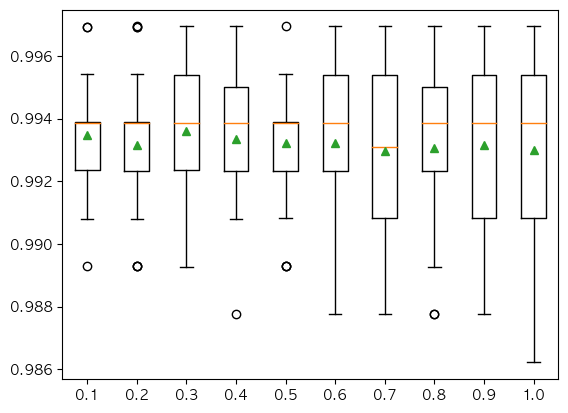

>0.1 Test Accuracy: 0.990 (0.003)
>0.2 Test Accuracy: 0.990 (0.003)
>0.3 Test Accuracy: 0.991 (0.003)
>0.4 Test Accuracy: 0.990 (0.003)
>0.5 Test Accuracy: 0.990 (0.003)
>0.6 Test Accuracy: 0.990 (0.003)
>0.7 Test Accuracy: 0.990 (0.003)
>0.8 Test Accuracy: 0.990 (0.003)
>0.9 Test Accuracy: 0.990 (0.003)
>1.0 Test Accuracy: 0.990 (0.003)


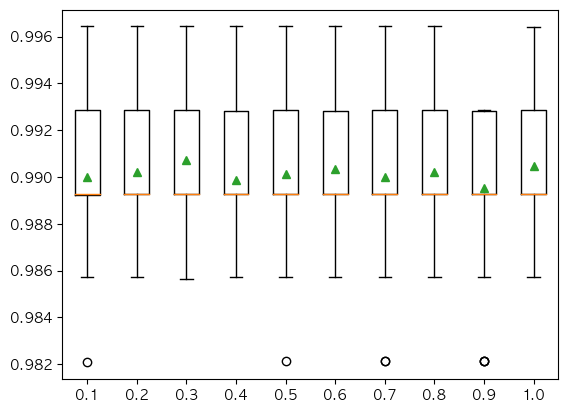

In [146]:
# explore xgboost column ratio per tree effect on performance
from numpy import arange
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

# define dataset
X_features = sumdf.drop(['group'], axis=1)
y_target = sumdf['group']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=100)

# get a list of models to evaluate (training에 사용되는 feature 수 0.1부터 1.0까지 바꿔가며 모델 생성)
def get_models():
    models = dict()
    # explore ratio of features from 10% to 100% in 10% increments
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = XGBClassifier(colsample_bytree=i)
    return models

# evaluate a given model using cross-validation (3번 반복된 10-fold CV로 모델 평가)
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results on the training set
results_train, names = list(), list()
for name, model in models.items():
    # evaluate the model on the training set
    scores_train = evaluate_model(model, X_train, y_train)
    # store the results for training set
    results_train.append(scores_train)
    names.append(name)
    # summarize the performance along the way
    print('>%s Train Accuracy: %.3f (%.3f)' % (name, mean(scores_train), std(scores_train)))

# plot model performance on the training set for comparison
pyplot.boxplot(results_train, labels=names, showmeans=True)
pyplot.show()

# evaluate the models and store results on the test set
results_test, names = list(), list()
for name, model in models.items():
    # evaluate the model on the test set
    scores_test = evaluate_model(model, X_test, y_test)
    # store the results for the test set
    results_test.append(scores_test)
    names.append(name)
    # summarize the performance along the way
    print('>%s Test Accuracy: %.3f (%.3f)' % (name, mean(scores_test), std(scores_test)))

# plot model performance on the test set for comparison
pyplot.boxplot(results_test, labels=names, showmeans=True)
pyplot.show()

>0.1 Train Accuracy: 0.992 (0.001)
>0.2 Train Accuracy: 0.992 (0.001)
>0.3 Train Accuracy: 0.992 (0.001)
>0.4 Train Accuracy: 0.993 (0.001)
>0.5 Train Accuracy: 0.993 (0.001)
>0.6 Train Accuracy: 0.993 (0.001)
>0.7 Train Accuracy: 0.993 (0.001)
>0.8 Train Accuracy: 0.993 (0.001)
>0.9 Train Accuracy: 0.993 (0.001)
>1.0 Train Accuracy: 0.993 (0.001)


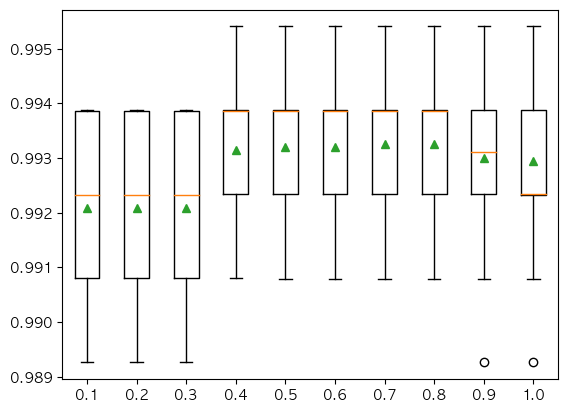

>0.1 Test Accuracy: 0.991 (0.002)
>0.2 Test Accuracy: 0.991 (0.002)
>0.3 Test Accuracy: 0.991 (0.002)
>0.4 Test Accuracy: 0.991 (0.002)
>0.5 Test Accuracy: 0.991 (0.002)
>0.6 Test Accuracy: 0.991 (0.002)
>0.7 Test Accuracy: 0.991 (0.003)
>0.8 Test Accuracy: 0.991 (0.003)
>0.9 Test Accuracy: 0.991 (0.003)
>1.0 Test Accuracy: 0.990 (0.003)


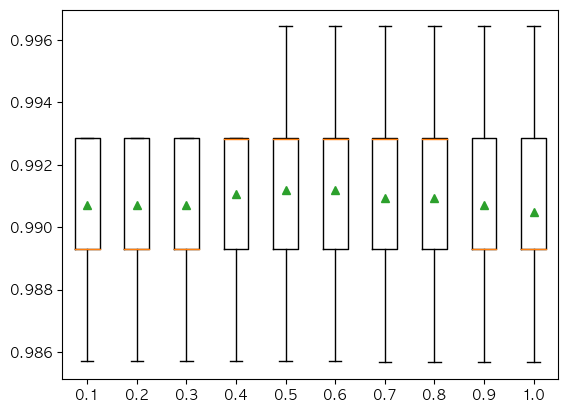

In [149]:
# explore xgboost column ratio per tree effect on performance
# define dataset
spca
y_target = sumdf['group']

X_train, X_test, y_train, y_test = train_test_split(spca, y_target, test_size=0.3, random_state=42)

# get a list of models to evaluate (training에 사용되는 feature 수 0.1부터 1.0까지 바꿔가며 모델 생성)
def get_models():
    models = dict()
    # explore ratio of features from 10% to 100% in 10% increments
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = XGBClassifier(colsample_bytree=i)
    return models

# evaluate a given model using cross-validation (3번 반복된 10-fold CV로 모델 평가)
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results on the training set
results_train, names = list(), list()
for name, model in models.items():
    # evaluate the model on the training set
    scores_train = evaluate_model(model, X_train, y_train)
    # store the results for training set
    results_train.append(scores_train)
    names.append(name)
    # summarize the performance along the way
    print('>%s Train Accuracy: %.3f (%.3f)' % (name, mean(scores_train), std(scores_train)))

# plot model performance on the training set for comparison
pyplot.boxplot(results_train, labels=names, showmeans=True)
pyplot.show()

# evaluate the models and store results on the test set
results_test, names = list(), list()
for name, model in models.items():
    # evaluate the model on the test set
    scores_test = evaluate_model(model, X_test, y_test)
    # store the results for the test set
    results_test.append(scores_test)
    names.append(name)
    # summarize the performance along the way
    print('>%s Test Accuracy: %.3f (%.3f)' % (name, mean(scores_test), std(scores_test)))

# plot model performance on the test set for comparison
pyplot.boxplot(results_test, labels=names, showmeans=True)
pyplot.show()

# 4. Random Forest Ensemble

>1 Train Accuracy: 0.992 (0.001)
>2 Train Accuracy: 0.992 (0.001)
>3 Train Accuracy: 0.993 (0.001)
>4 Train Accuracy: 0.993 (0.001)
>5 Train Accuracy: 0.993 (0.002)
>6 Train Accuracy: 0.993 (0.002)
>7 Train Accuracy: 0.994 (0.002)
>None Train Accuracy: 0.994 (0.002)


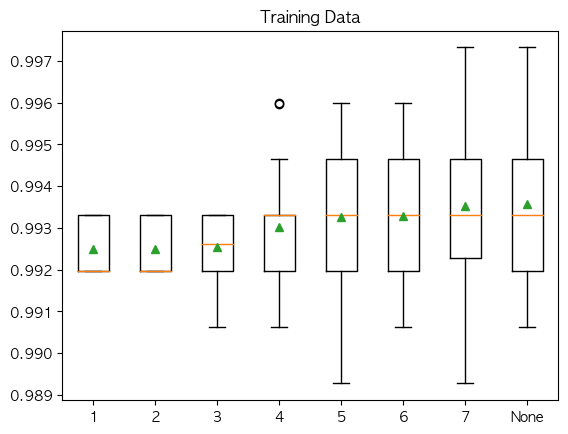

>1 Test Accuracy: 0.992 (0.003)
>2 Test Accuracy: 0.991 (0.003)
>3 Test Accuracy: 0.992 (0.003)
>4 Test Accuracy: 0.992 (0.004)
>5 Test Accuracy: 0.992 (0.004)
>6 Test Accuracy: 0.992 (0.004)
>7 Test Accuracy: 0.992 (0.004)
>None Test Accuracy: 0.992 (0.004)


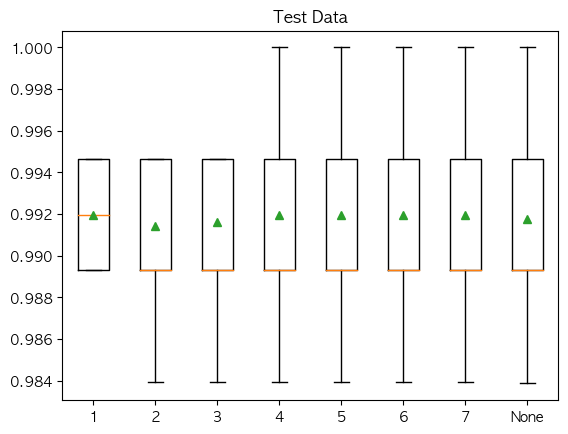

In [165]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define dataset
X_features = sumdf.drop(['group'], axis=1)
y_target = sumdf['group']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# max_depth = 1~7, None으로 바꿔가며 모델 정의
def get_models():
    models = dict()
    depths = [i for i in range(1,8)] + [None]
    for n in depths:
        models[str(n)] = RandomForestClassifier(max_depth=n)
    return models

# 모델 평가 함수
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

models = get_models() # 모델 정의

# 모델 평가 및 성능 저장
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    # 성능 출력
    print('>%s Train Accuracy: %.3f (%.3f)' % (name, mean(scores), std(scores)))

# 훈련 데이터의 boxplot
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title('Training Data')
pyplot.show()

# 테스트 데이터의 성능 저장
results_test, names_test = list(), list()

for name, model in models.items():
    # 테스트 데이터에 대한 성능 평가
    scores_test = evaluate_model(model, X_test, y_test)
    results_test.append(scores_test)
    names_test.append(name)
    
    # 테스트 데이터의 성능 출력
    print('>%s Test Accuracy: %.3f (%.3f)' % (name, mean(scores_test), std(scores_test)))

# 테스트 데이터의 boxplot
pyplot.boxplot(results_test, labels=names_test, showmeans=True)
pyplot.title('Test Data')
pyplot.show()

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define dataset
X_features = sumdf.drop(['group'], axis=1)
y_target = sumdf['group']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# Create a RandomForestClassifier instance
model = RandomForestClassifier(max_depth=7)  # You can set other hyperparameters

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy: %.3f' % accuracy)

Test Accuracy: 0.992


In [169]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 함수 정의: 실제-분류 산점도 그리기
def plot_actual_vs_predicted(model, X_test, y_test):
    # 모델 예측
    y_pred = model.predict(X_test)
    
    # 혼동 행렬 계산
    cm = confusion_matrix(y_test, y_pred)
    
    # Seaborn을 사용한 heatmap 그리기
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# 각 모델에 대해 실제-분류 산점도 그리기
for name, model in models.items():
    plot_actual_vs_predicted(model, X_test, y_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

>1 Train Accuracy: 0.992 (0.001)
>2 Train Accuracy: 0.992 (0.001)
>3 Train Accuracy: 0.992 (0.001)
>4 Train Accuracy: 0.992 (0.001)
>5 Train Accuracy: 0.992 (0.001)
>6 Train Accuracy: 0.992 (0.001)
>7 Train Accuracy: 0.992 (0.001)
>None Train Accuracy: 0.993 (0.001)


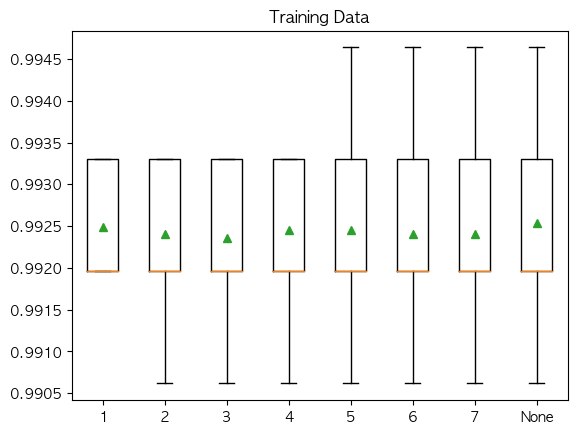

>1 Test Accuracy: 0.992 (0.003)
>2 Test Accuracy: 0.992 (0.003)
>3 Test Accuracy: 0.992 (0.003)
>4 Test Accuracy: 0.992 (0.003)
>5 Test Accuracy: 0.992 (0.003)
>6 Test Accuracy: 0.992 (0.003)
>7 Test Accuracy: 0.991 (0.003)
>None Test Accuracy: 0.991 (0.003)


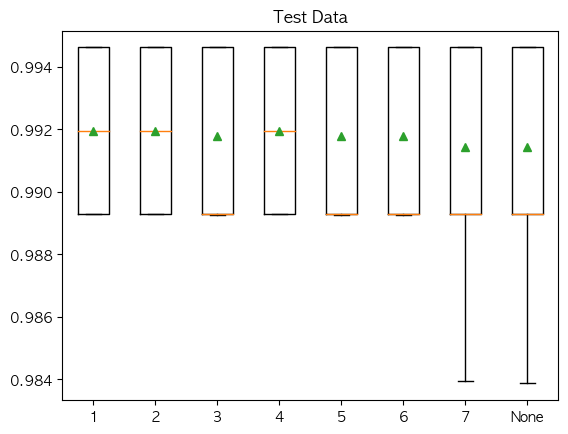

In [156]:
# define dataset
spca
y_target = sumdf['group']

X_train, X_test, y_train, y_test = train_test_split(spca, y_target, test_size=0.2, random_state=42)

# max_depth = 1~7, None으로 바꿔가며 모델 정의
def get_models():
    models = dict()
    depths = [i for i in range(1,8)] + [None]
    for n in depths:
        models[str(n)] = RandomForestClassifier(max_depth=n)
    return models

# 모델 평가 함수
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

models = get_models() # 모델 정의

# 모델 평가 및 성능 저장
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    # 성능 출력
    print('>%s Train Accuracy: %.3f (%.3f)' % (name, mean(scores), std(scores)))

# 훈련 데이터의 boxplot
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title('Training Data')
pyplot.show()

# 테스트 데이터의 성능 저장
results_test, names_test = list(), list()

for name, model in models.items():
    # 테스트 데이터에 대한 성능 평가
    scores_test = evaluate_model(model, X_test, y_test)
    results_test.append(scores_test)
    names_test.append(name)
    
    # 테스트 데이터의 성능 출력
    print('>%s Test Accuracy: %.3f (%.3f)' % (name, mean(scores_test), std(scores_test)))

# 테스트 데이터의 boxplot
pyplot.boxplot(results_test, labels=names_test, showmeans=True)
pyplot.title('Test Data')
pyplot.show()